## Kmean 군집화 직접 만듬

In [ ]:
def distance(x1,x2):
  return sum((x1-x2)**2)**(1/2)

In [ ]:
import numpy as np
na1 =np.array([1,2])
na2 =np.array([5,5])
print(distance(na1,na2))

5.0


In [ ]:
import matplotlib.pyplot as plt
def kmeans(data,k=3):
  colors=['r','g','b']
  centers=[]
  dl = len(data)
  #초기에 k개의 중심점 설정(좋은 설정에 관한 사항은 여기에서는 논하지 않는다.)
  for center in range(k):
    ci = np.random.randint(dl) #랜덤하게 센터 인덱스 결정
    centers.append(data[ci]) #센터를 보관

  while True: #반복   
    #모든 점들을 k개의 중심점과 거리를 계산하여 가까운 그룹에 속하게 한다.  
    cs ={} #그룹 사전
    for elem in data: #모든 점들을
      distances = []
      for i in range(k):#모든 중심점들과
        dis = distance(centers[i],elem) #거리 계산
        distances.append(dis)
      nd = np.array(distances)#계산을 편하게 하기 위해 numpy 배열로 변환
      ai = nd.argmin()#최소값이 있는 인덱스
      if ai in cs:#해당 그룹이 있다면
        cs[ai].append(elem) #해당 그룹에 소속시킨다.
      else:#해당 그룹이 현재 없다면(처음으로 해당 그룹에 속한 점을 발견)
        cs[ai]=[]#사전에 해당 그룹을 추가(값은 빈 목록)
        cs[ai].append(elem)#해당 그룹에 소속시킨다.
    
    #그룹의 중심점을 계산한다.
    rcenters =[]
    for i in range(k):#K개의 그룹에 관하여      
      sx = np.array([x for x,_ in cs[i]])
      sy = np.array([y for _,y in cs[i]])
      rcenters.append([sx.mean(),sy.mean()])#중심점 계산
      plt.plot(sx,sy,colors[i]+'.')
      plt.plot([centers[i][0]],[centers[i][1]],colors[i]+'o')
    if np.array_equal(centers,rcenters): #기존 중심점들과 새로 계산한 중심점들이 같다면
      break #작업 완료하였으므로 while루프 탈출
    else:
      centers = rcenters
    plt.show()
  return cs #클러스터링 결과 반환

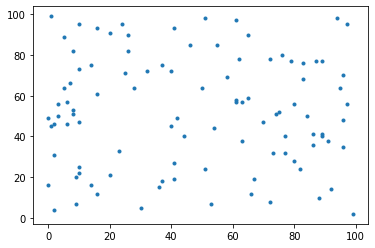

In [ ]:
n = 100
dl = [[np.random.randint(0,100),np.random.randint(0,100)] for _ in range(n)]
data = np.array(dl)
xd = np.array([x for x,_ in data])
yd = np.array([y for _,y in data])
plt.plot(xd,yd,'.')
plt.show()

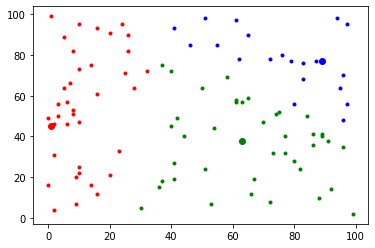

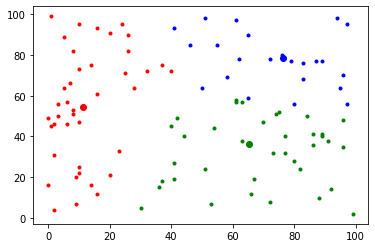

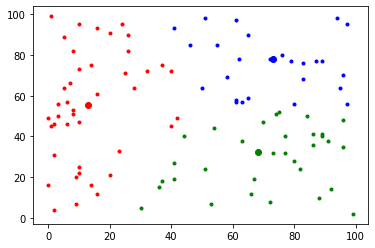

{2: [array([83, 68]), array([41, 93]), array([80, 56]), array([76, 80]), array([97, 95]), array([89, 77]), array([51, 98]), array([83, 76]), array([94, 98]), array([79, 77]), array([87, 77]), array([61, 57]), array([46, 85]), array([58, 69]), array([95, 64]), array([61, 58]), array([50, 64]), array([97, 56]), array([55, 85]), array([96, 70]), array([61, 97]), array([65, 90]), array([63, 57]), array([72, 78]), array([65, 59]), array([62, 78])], 1: [array([75, 52]), array([82, 24]), array([77, 32]), array([80, 28]), array([74, 51]), array([63, 38]), array([36, 15]), array([44, 40]), array([86, 41]), array([73, 32]), array([72,  8]), array([86, 36]), array([41, 19]), array([99,  2]), array([70, 47]), array([37, 18]), array([51, 24]), array([89, 41]), array([88, 10]), array([77, 40]), array([92, 14]), array([91, 38]), array([67, 19]), array([41, 27]), array([84, 50]), array([89, 40]), array([66, 12]), array([30,  5]), array([53,  7]), array([96, 35]), array([96, 48]), array([54, 44])], 0: 

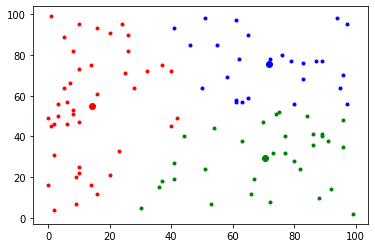

In [ ]:
cls = kmeans(data)
print(cls)

In [ ]:
print(cls.keys())

dict_keys([2, 1, 0])


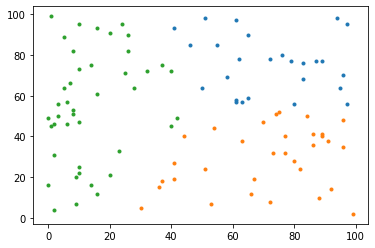

In [ ]:
for key in cls.keys():
  sx = np.array([x for x,_ in cls[key]])
  sy = np.array([y for _,y in cls[key]])
  plt.plot(sx,sy,'.')
plt.show()

#비지도학습

##군집알고리즘

### 데이터 준비하기

In [4]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-05-17 16:04:52--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-05-17 16:04:52--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-05-17 16:04:52--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [5]:
path = '/content/fruits_300.npy'
import numpy as np
fruits = np.load(path)

In [ ]:
fruits.shape

(300, 100, 100)

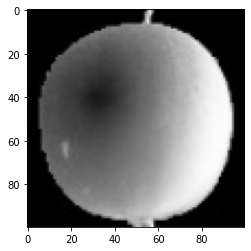

In [ ]:
plt.imshow(fruits[0],cmap='gray')
plt.show()

In [ ]:
for r in range(0,100,5):
  for c in range(0,100,5):
    if(fruits[0][r][c]>=10):
      print("12",end='')
    else : 
      print("  ",end='')
  print()

                      12                
                      12                
            121212121212121212          
        12121212121212121212121212      
      1212121212121212121212121212      
      121212121212121212121212121212    
    1212121212121212121212121212121212  
    1212121212121212121212121212121212  
  121212121212121212121212121212121212  
  121212121212121212121212121212121212  
  121212121212121212121212121212121212  
    1212121212121212121212121212121212  
    1212121212121212121212121212121212  
    1212121212121212121212121212121212  
    1212121212121212121212121212121212  
      121212121212121212121212121212    
      121212121212121212121212121212    
        12121212121212121212121212      
          1212121212121212121212        
              12121212121212            


In [ ]:
fruits.min() , fruits.max()

(1, 255)

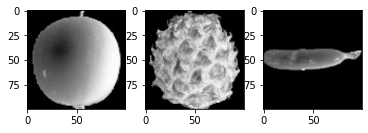

In [ ]:
fig,axs = plt.subplots(1,3)
axs[0].imshow(fruits[0],cmap='gray')
axs[1].imshow(fruits[100],cmap='gray')
axs[2].imshow(fruits[200],cmap='gray')
plt.show()

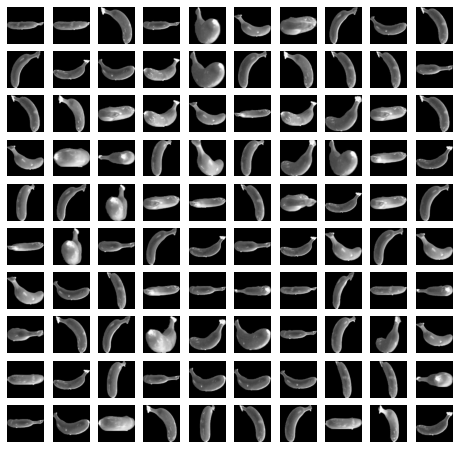

In [ ]:
# fig,axs = plt.subplots(10,10,figsize=(8,8))
# for r in range(10):
#   for c in range(10):
#     axs[r][c].imshow(fruits[200+r*10+c],cmap='gray')
#     axs[r][c].axis['off'] # x,y축을 그리지 마시오
# plt.show()

fig,axs = plt.subplots(10,10,figsize =(8,8))
for r in range(10) :
  for c in range(10) :
    axs[r][c].imshow(fruits[200+r*10+c],cmap ='gray')
    axs[r][c].axis('off') # x,y축을 그리지마세요.
plt.show()    #100개의 바나나 이미지

### 픽셀값 분석하기

In [ ]:
apple = fruits[0:100].reshape(-1,100*100)
apple.shape

(100, 10000)

In [ ]:
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

In [ ]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


In [ ]:
print(banana.mean(axis=1))

[19.5487 24.4884 36.7517 18.568  53.572  31.5789 51.9062 28.4703 23.7856
 32.1295 29.1737 24.5578 27.7676 41.3082 61.0437 32.6444 38.4187 30.4175
 30.0639 21.4994 32.6018 39.6335 47.8397 57.7484 33.6511 23.5018 49.6817
 44.0855 46.1559 33.4963 36.0099 69.0751 33.9575 32.8786 60.1911 32.9949
 45.3359 56.1694 36.9218 25.6754 32.7901 29.0245 57.7134 44.6563 31.2138
 29.836  40.9228 23.7501 43.1543 32.3716 26.0986 55.6189 22.2269 29.5089
 24.0435 22.6247 24.1709 46.2714 32.0763 42.5076 44.5522 24.0199 27.68
 32.4377 19.2198 22.5083 19.6742 26.1852 25.8368 25.2676 26.4721 34.8503
 28.5235 80.8545 36.9371 47.3975 18.7909 33.0428 37.8222 34.7819 33.6051
 24.3963 32.7988 19.7609 32.538  28.5407 23.0999 26.3778 27.1965 38.7848
 18.7648 30.2297 54.3816 37.9073 32.3126 31.0664 33.1657 37.6051 38.1806
 26.2805]


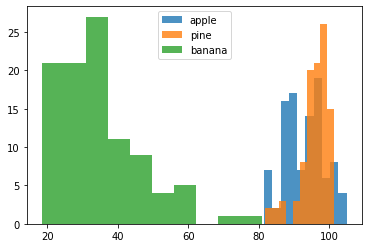

In [ ]:
plt.hist(np.mean(apple,axis=1),alpha = 0.8,label='apple')
plt.hist(np.mean(pineapple,axis=1),alpha = 0.8,label='pine')
plt.hist(np.mean(banana,axis=1),alpha = 0.8,label='banana')
plt.legend()
plt.show()

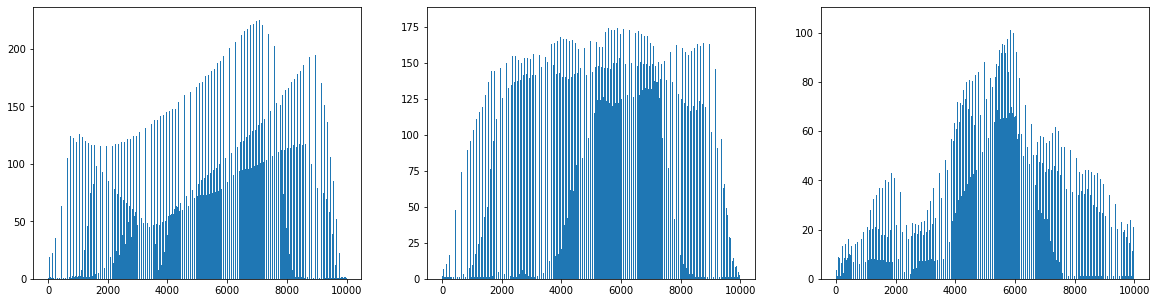

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple,axis=0))
axs[1].bar(range(10000), np.mean(pineapple,axis=0))
axs[2].bar(range(10000), np.mean(banana,axis=0))
plt.show()

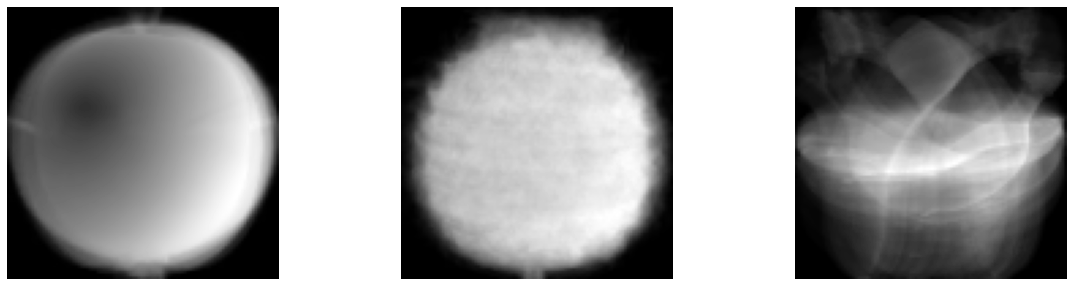

In [ ]:
apple_mean = np.mean(apple,axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple,axis=0).reshape(100,100)
banana_mean = np.mean(banana,axis=0).reshape(100,100)
fig,axs = plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray')
axs[0].axis('off')
axs[1].imshow(pineapple_mean, cmap='gray')
axs[1].axis('off')
axs[2].imshow(banana_mean, cmap='gray')
axs[2].axis('off')
plt.show()

##k-평균

###KMeans클래스

In [6]:
fruits_2d = fruits.reshape(-1,100*100)
fruits_2d.shape

(300, 10000)

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(fruits_2d)

KMeans(n_clusters=3)

In [8]:
print(km.labels_)

[1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [9]:
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 98,  91, 111]))


In [10]:
km.labels_==0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [11]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 98,  91, 111]))

In [12]:
def draw_fruits(arr,ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j<n:
        axs[i,j].imshow(arr[i*10+j], cmap='gray')
      axs[i,j].axis('off')
  plt.show()

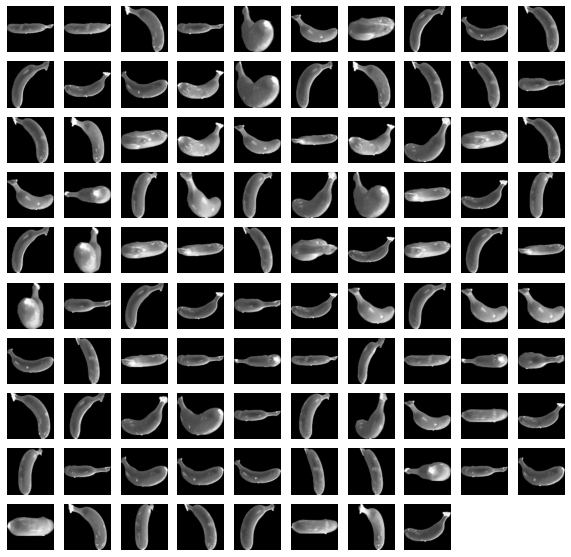

In [14]:
import matplotlib.pyplot as plt
draw_fruits(fruits[km.labels_==0])

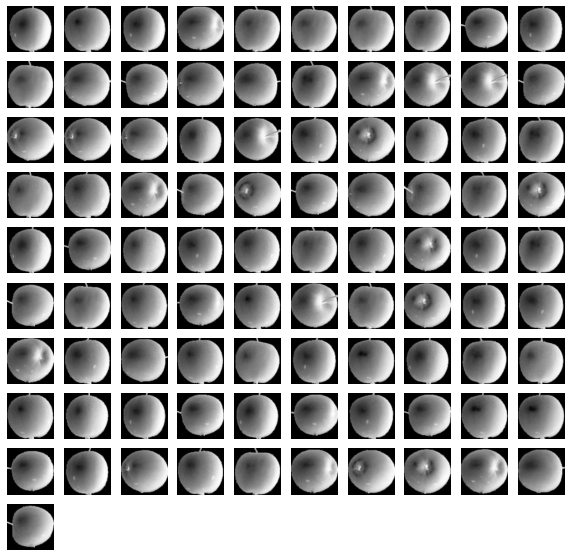

In [15]:
draw_fruits(fruits[km.labels_==1])

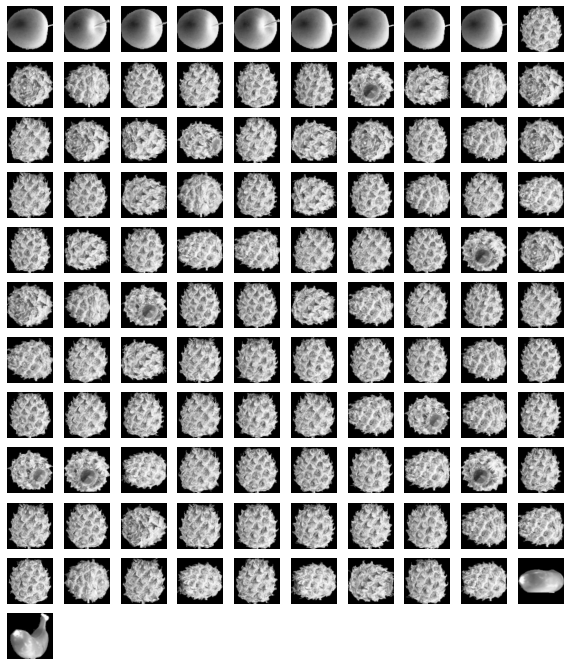

In [16]:
draw_fruits(fruits[km.labels_==2])

### 클러스터 중심

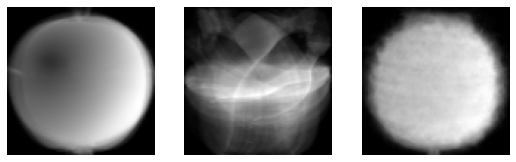

In [ ]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)

In [ ]:
print(km.n_iter_) #반복적으로 클러스터 중심을 옮기면서 최적의 클러스터를 찾는데 알고리즘이 반복한 횟수

4


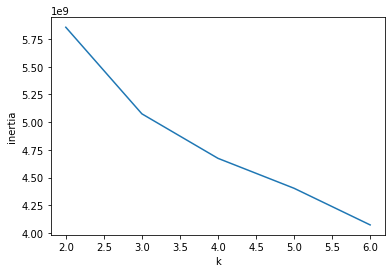

In [ ]:
inertia = []
for k in range(2,7):
  km = KMeans(n_clusters=k)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

##주성분 분석(PCA)

###차원과 차원축소

In [17]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
from sklearn.decomposition import PCA
fruits =np.load('/content/fruits_300.npy')
fruit_2d = fruits.reshape(-1,100*100)
pca = PCA(n_components=50)
pca.fit(fruit_2d)
print(pca.components_.shape)

--2022-05-17 16:15:39--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-05-17 16:15:39--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-05-17 16:15:40--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

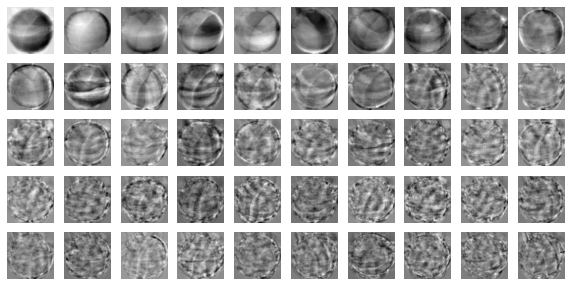

In [18]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [19]:
fruits_pca = pca.transform(fruits_2d) # 10000개의 특성 수를 50가의 특성 수로 변환
print(fruits_pca.shape)

(300, 50)


In [ ]:
km = KMeans(n_clusters=3)
km.fit(fruits_pca)
print(km.labels_)

[2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [ ]:
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 98, 111,  91]))


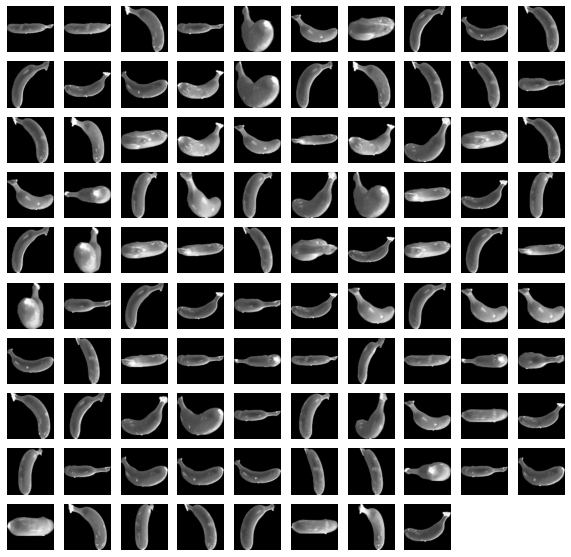

In [ ]:
draw_fruits(fruits[km.labels_==0])

In [20]:
print(np.sum(pca.explained_variance_ratio_))

0.9215397412981537


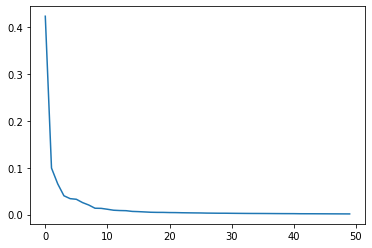

In [21]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

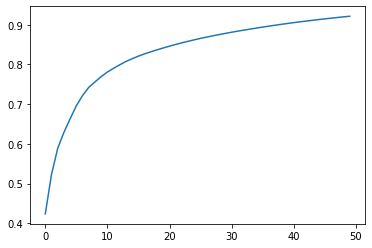

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

#딥러닝

##인공 신경망
퍼셉트론, 입력뉴런, 출력뉴런, 히든계층

###패션 MNIST

In [ ]:
from tensorflow import keras

In [ ]:
# print(type(data))
# print(len(data))

In [ ]:
(train_input,train_target) , (test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
print(train_input.shape)
print(test_input.shape)

(60000, 28, 28)
(10000, 28, 28)


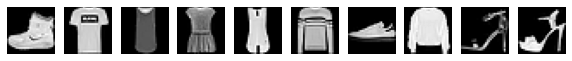

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray')
  axs[i].axis('off')
plt.show()

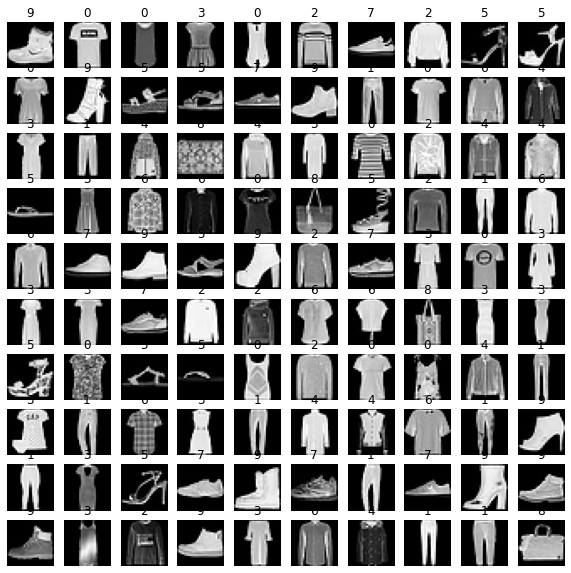

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(10,10,figsize=(10,10))
for r in range(10):
  for c in range(10):
    axs[r][c].imshow(train_input[r*10+c], cmap='gray')
    axs[r][c].axis('off')
    axs[r][c].set_title(train_target[r*10+c])
plt.show()

In [ ]:
import numpy as np
print(np.unique(train_target,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


###로지스틱 회귀로 패션 아이템 분류하기

In [ ]:
train_scaled = train_input/255.0 #min-max 변환 (값-최솟값)/(최댓값-최솟값)
train_scaled = train_scaled.reshape(-1,28*28)
print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier()
scores = cross_validate(sc,train_scaled,train_target,n_jobs=-1)
print(np.mean(scores['test_score']))

0.8399333333333333


### 인공신경망

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target) , (test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0 #min-max 변환 (값-최솟값)/(최댓값-최솟값)
train_scaled = train_scaled.reshape(-1,28*28)
print(train_scaled.shape)

(60000, 784)


In [ ]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,test_size=0.2)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(val_scaled.shape,val_target.shape)

(12000, 784) (12000,)


In [ ]:
dense = keras.layers.Dense(10,activation='softmax',input_shape=(784,))
model = keras.Sequential(dense)
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6107 - accuracy: 0.7926
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4808 - accuracy: 0.8395
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4567 - accuracy: 0.8473
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4457 - accuracy: 0.8515
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4380 - accuracy: 0.8550


In [ ]:
print(model.evaluate(val_scaled,val_target))

375/375 [==============================] - 1s 1ms/step - loss: 0.4526 - accuracy: 0.8468
[0.45263051986694336, 0.846833348274231]


## 심층 신경망

### 2개의 층

In [ ]:
from tensorflow import keras
(train_input,train_target) , (test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled = train_input/255.0 #min-max 변환 (값-최솟값)/(최댓값-최솟값)
train_scaled = train_scaled.reshape(-1,28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,test_size=0.2)

In [ ]:
dense1 = keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
dense2 = keras.layers.Dense(10,activation='softmax')

In [ ]:
model = keras.Sequential([dense1,dense2])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#층 추가하는 여러가지 방법
#1
# dense1 = keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
# dense2 = keras.layers.Dense(10,activation='softmax')
#model = keras.Sequential([dense1,dense2])


#2 
# model = keras.Sequential([keras.layers.Dense(100,activation='sigmoid',input_shape=(784,),name='hidden'),
#                          keras.layers.Dense(10,activation='softmax',name='output'),name='패션 MNIST모델' ])

#3
# model = keras.Sequential()
# model.add(keras.layers.Dense(100,activation='sigmoid',input_shape=(784,)))
# model.add(keras.layers.Dense(10,activation='softmax'))

### 심층 신경망 만들기(Deep NN)

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target) , (test_input,test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255.0 #min-max 변환 (값-최솟값)/(최댓값-최솟값)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,test_size=0.2)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(100,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
model.fit(train_scaled,train_target,epochs=30)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5644 - accuracy: 0.8065
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3949 - accuracy: 0.8593
Epoch 3/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3582 - accuracy: 0.8707
Epoch 4/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3358 - accuracy: 0.8804
Epoch 5/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3219 - accuracy: 0.8852
Epoch 6/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3126 - accuracy: 0.8892
Epoch 7/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3025 - accuracy: 0.8934
Epoch 8/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2932 - accuracy: 0.8960
Epoch 9/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2887 - accuracy: 0.8990
Epoch 10/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.280

In [ ]:
print(model.evaluate(val_scaled,val_target))

375/375 [==============================] - 1s 2ms/step - loss: 0.4963 - accuracy: 0.8909
[0.49626606702804565, 0.890916645526886]


###옵티마이저

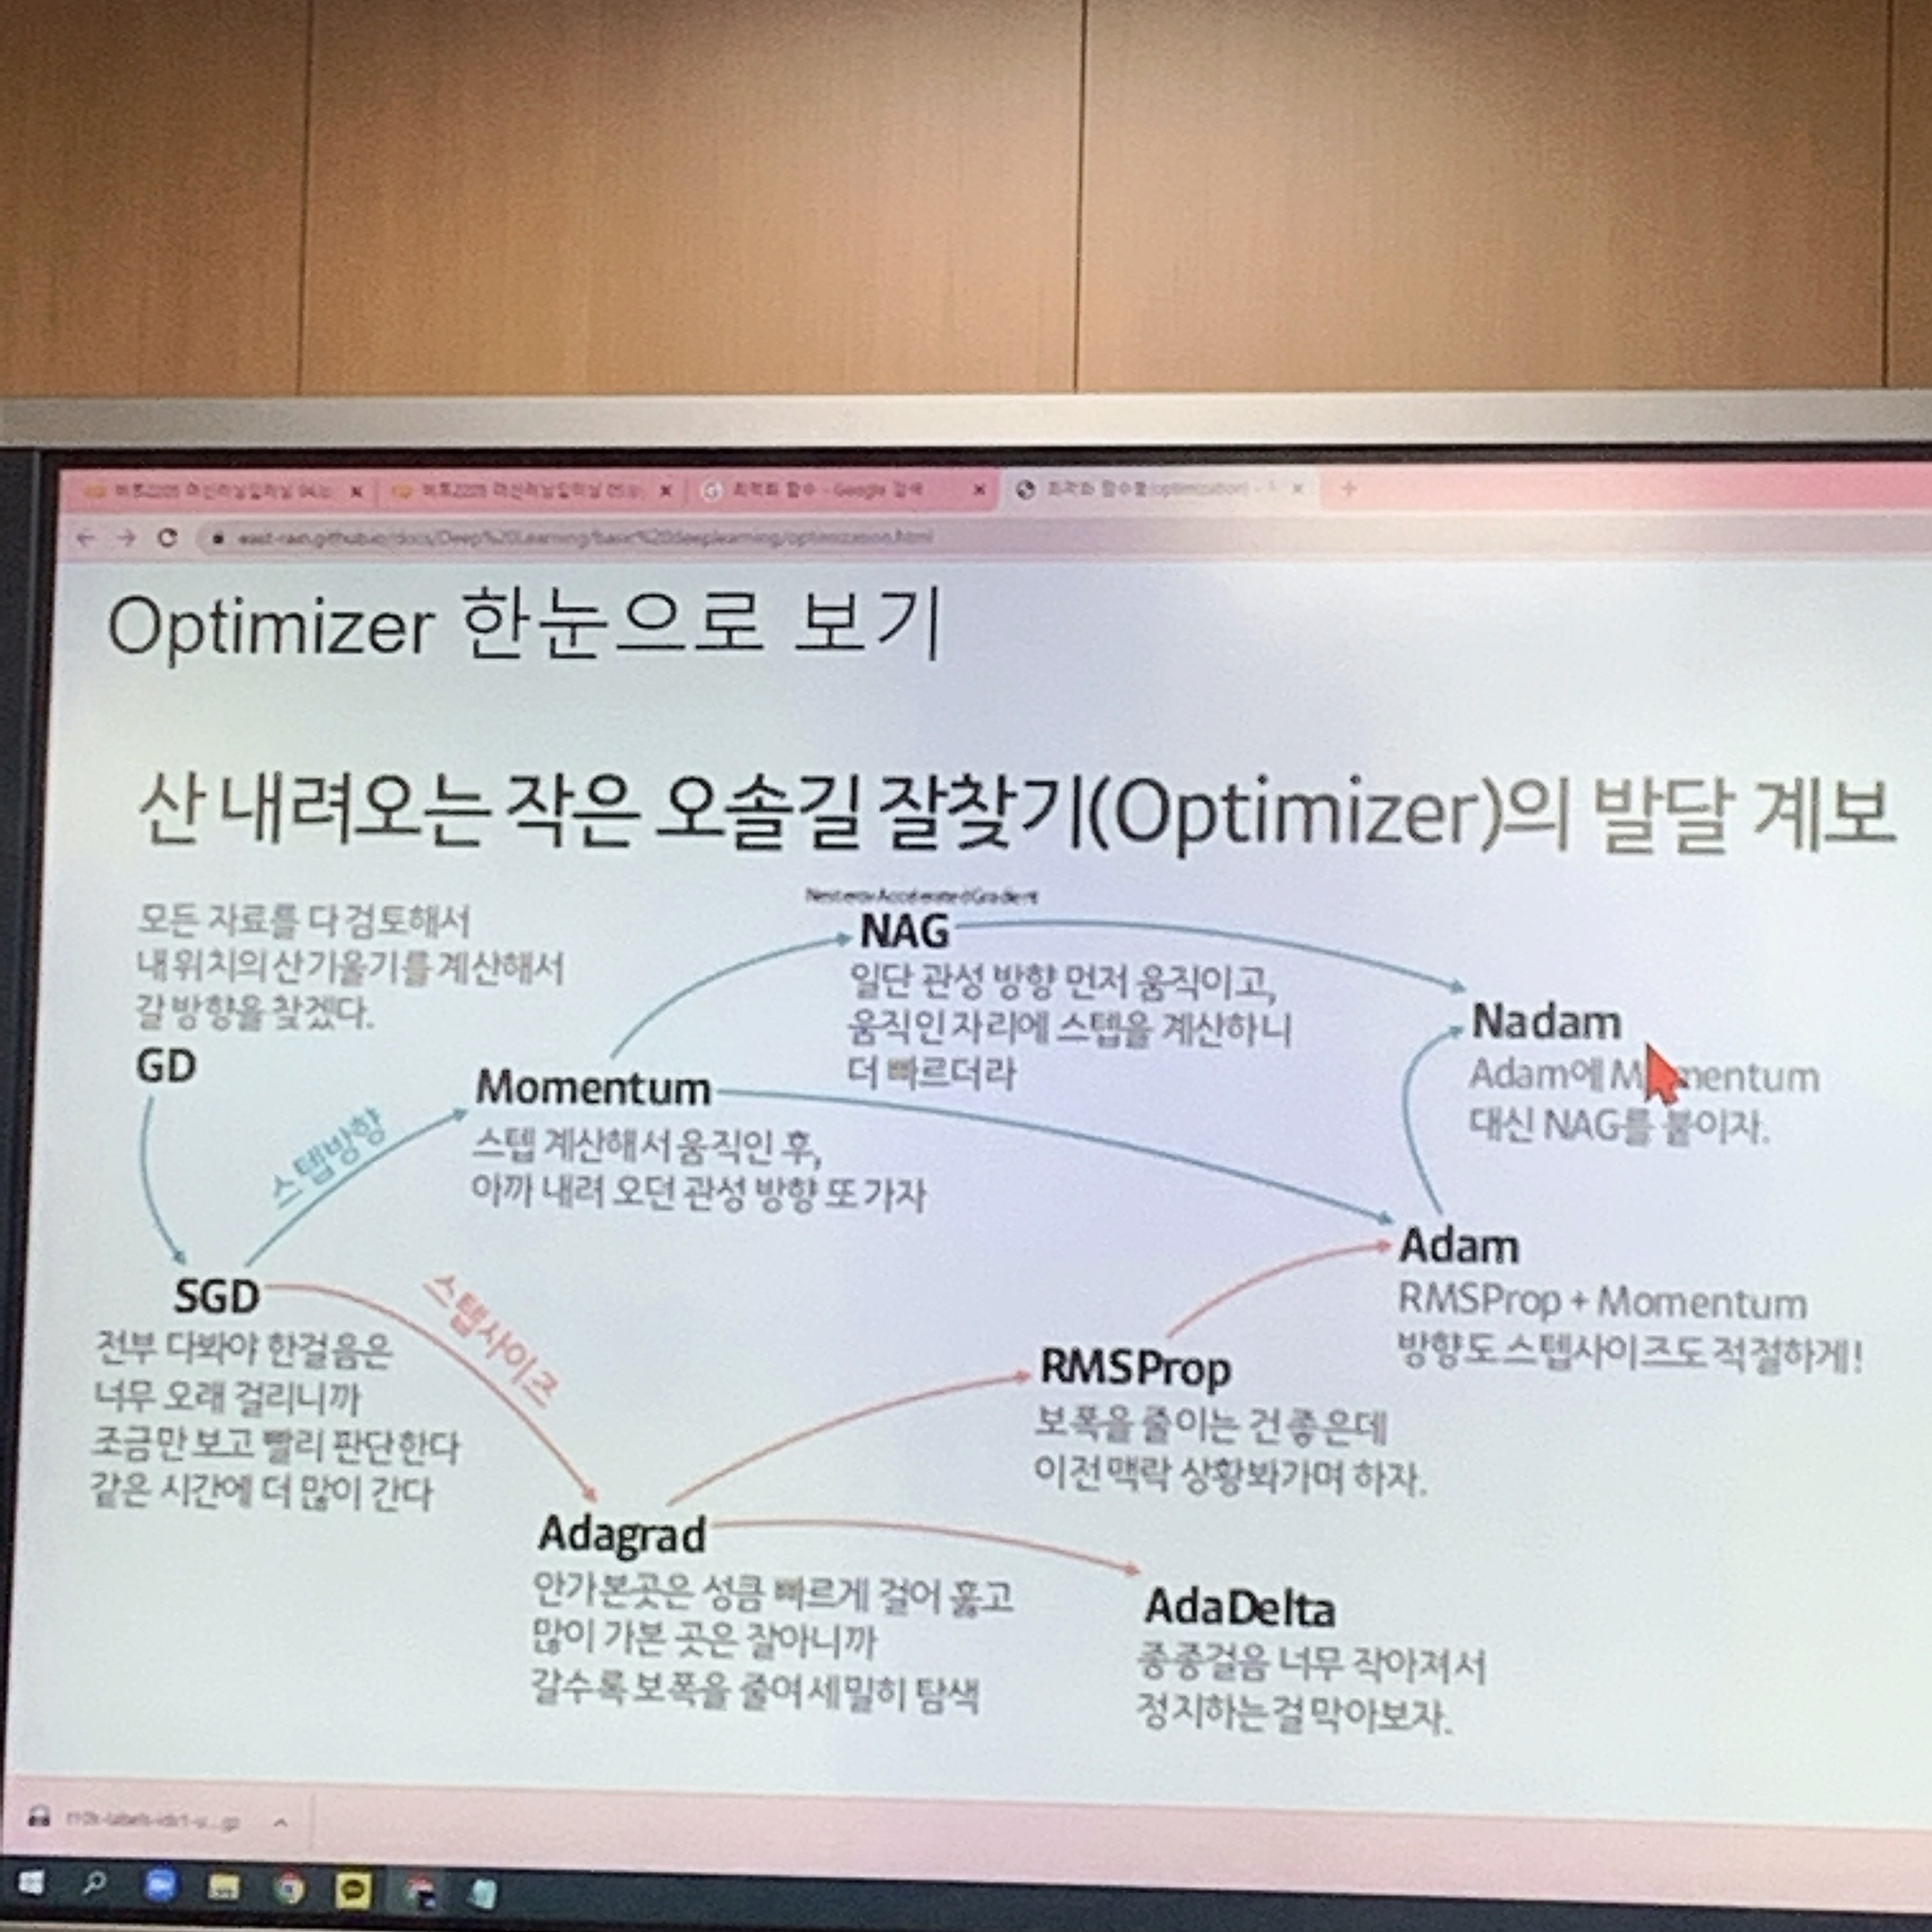

In [ ]:
#옵티마이저 -relu, adam
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target) , (test_input,test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255.0 #min-max 변환 (값-최솟값)/(최댓값-최솟값)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,test_size=0.2)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(100,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5624 - accuracy: 0.8095
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4092 - accuracy: 0.8560
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3676 - accuracy: 0.8686
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3411 - accuracy: 0.8769
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3244 - accuracy: 0.8815


In [ ]:
print(model.evaluate(val_scaled,val_target))

375/375 [==============================] - 1s 2ms/step - loss: 0.3389 - accuracy: 0.8769
[0.33893609046936035, 0.8769166469573975]


In [ ]:
#옵티마이저 -relu, adagrad
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target) , (test_input,test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255.0 #min-max 변환 (값-최솟값)/(최댓값-최솟값)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,test_size=0.2)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(100,activation='softmax'))

model.compile(optimizer='adagrad',loss='sparse_categorical_crossentropy',metrics='accuracy')

model.fit(train_scaled,train_target,epochs=5)

print(model.evaluate(val_scaled,val_target))

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7063 - accuracy: 0.5776
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9138 - accuracy: 0.7167
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7911 - accuracy: 0.7465
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7292 - accuracy: 0.7649
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.6600 - accuracy: 0.7893
[0.6599774360656738, 0.7892500162124634]


In [ ]:
#옵티마이저 -relu, rmsprop
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target) , (test_input,test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255.0 #min-max 변환 (값-최솟값)/(최댓값-최솟값)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,test_size=0.2)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(100,activation='softmax'))

model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics='accuracy')

model.fit(train_scaled,train_target,epochs=5)

print(model.evaluate(val_scaled,val_target))

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5618 - accuracy: 0.8062
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4010 - accuracy: 0.8551
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3625 - accuracy: 0.8709
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3414 - accuracy: 0.8789
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 0.3399 - accuracy: 0.8782
[0.33985593914985657, 0.878166675567627]


##신경망 모델 훈련

###손실곡선

In [ ]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100,activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target) , (test_input,test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255.0 #min-max 변환 (값-최솟값)/(최댓값-최솟값)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,test_size=0.2)

model = model_fn()

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
hist = model.fit(train_scaled,train_target,epochs=30)

Epoch 1/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5350 - accuracy: 0.8128
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3998 - accuracy: 0.8576
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3595 - accuracy: 0.8700
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3399 - accuracy: 0.8769
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3235 - accuracy: 0.8836
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3154 - accuracy: 0.8896
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3040 - accuracy: 0.8924
Epoch 8/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2949 - accuracy: 0.8961
Epoch 9/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2890 - accuracy: 0.8982
Epoch 10/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.285

In [ ]:
print(hist)
print(hist.history)
print(hist.history.keys())

{'loss': [0.5349504351615906, 0.39981549978256226, 0.3595232367515564, 0.33986249566078186, 0.3234652578830719, 0.3154393136501312, 0.30396977066993713, 0.29491138458251953, 0.28903529047966003, 0.28515705466270447, 0.2770884335041046, 0.2690425217151642, 0.26716694235801697, 0.26033052802085876, 0.2575109899044037, 0.25070643424987793, 0.24729658663272858, 0.24282287061214447, 0.24101723730564117, 0.23553504049777985, 0.23040063679218292, 0.22882835566997528, 0.22487829625606537, 0.22048616409301758, 0.2170591652393341, 0.21473392844200134, 0.21052996814250946, 0.20791096985340118, 0.20366257429122925, 0.20322974026203156], 'accuracy': [0.812791645526886, 0.8576458096504211, 0.8699791431427002, 0.8769166469573975, 0.8836458325386047, 0.8896041512489319, 0.8924166560173035, 0.8961458206176758, 0.8982499837875366, 0.9003958106040955, 0.9039791822433472, 0.906083345413208, 0.9067916870117188, 0.9104166626930237, 0.9098125100135803, 0.9144791960716248, 0.9158541560173035, 0.91683334112167

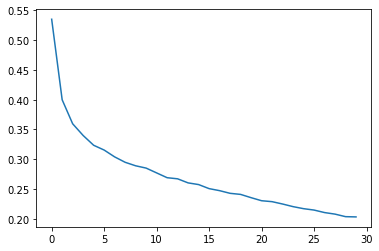

In [ ]:
plt.plot(hist.history['loss'])
plt.show()

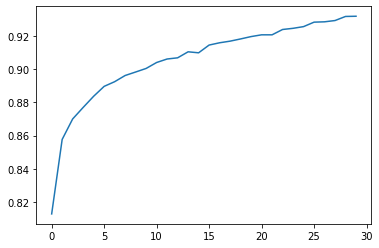

In [ ]:
plt.plot(hist.history['accuracy'])
plt.show()

###검증 손실

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

history = model.fit(train_scaled,train_target,epochs=150,validation_data=(val_scaled,val_target))


Epoch 1/150
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5392 - accuracy: 0.8115 - val_loss: 0.4447 - val_accuracy: 0.8343
Epoch 2/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3975 - accuracy: 0.8575 - val_loss: 0.3934 - val_accuracy: 0.8602
Epoch 3/150
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3593 - accuracy: 0.8714 - val_loss: 0.3690 - val_accuracy: 0.8728
Epoch 4/150
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3414 - accuracy: 0.8788 - val_loss: 0.3560 - val_accuracy: 0.8818
Epoch 5/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3252 - accuracy: 0.8846 - val_loss: 0.3367 - val_accuracy: 0.8867
Epoch 6/150
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3142 - accuracy: 0.8892 - val_loss: 0.4359 - val_accuracy: 0.8494
Epoch 7/150
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3052 - accuracy: 0.8920 - val_loss: 0.3631 - val_a

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


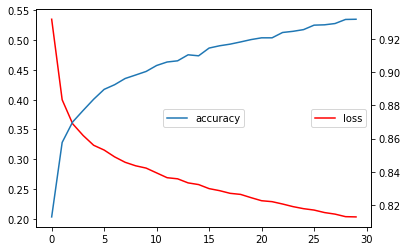

In [ ]:
fig,ax1 = plt.subplots()
ax1.plot(hist.history['loss'],label='loss',color='r')
ax1.legend(loc='center right')
ax2 = ax1.twinx()
ax2.plot(hist.history['accuracy'],label='accuracy')
ax2.legend(loc='center')
plt.show()

###드롭아웃

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target) , (test_input,test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255.0 #min-max 변환 (값-최솟값)/(최댓값-최솟값)
train_scaled = train_scaled.reshape(-1,28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,test_size=0.2)

flat_layer = keras.layers.Flatten(input_shape=(28,28))
dense1 = keras.layers.Dense(100,activation='sigmoid')
dense2 = keras.layers.Dense(10,activation='softmax')
model = keras.Sequential()
model.add(flat_layer)
model.add(dense1)
model.add(keras.layers.Dropout(0.5))
model.add(dense2)
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_30 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(train_scaled,train_target,epochs=150,validation_data=(val_scaled,val_target))

Epoch 1/150
1500/1500 [==============================] - 6s 3ms/step - loss: 0.7039 - accuracy: 0.7541 - val_loss: 0.4538 - val_accuracy: 0.8344
Epoch 2/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5063 - accuracy: 0.8212 - val_loss: 0.4247 - val_accuracy: 0.8429
Epoch 3/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4721 - accuracy: 0.8322 - val_loss: 0.4048 - val_accuracy: 0.8522
Epoch 4/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4568 - accuracy: 0.8400 - val_loss: 0.3839 - val_accuracy: 0.8631
Epoch 5/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4445 - accuracy: 0.8452 - val_loss: 0.3851 - val_accuracy: 0.8629
Epoch 6/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4309 - accuracy: 0.8508 - val_loss: 0.3654 - val_accuracy: 0.8692
Epoch 7/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4287 - accuracy: 0.8508 - val_loss: 0.3652 - val_ac

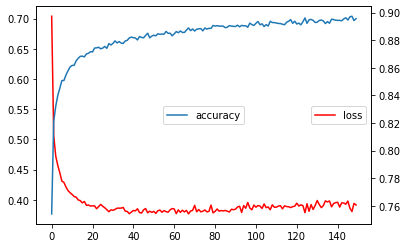

In [ ]:
fig,ax1 = plt.subplots()
ax1.plot(hist.history['loss'],label='loss',color='r')
ax1.legend(loc='center right')
ax2 = ax1.twinx()
ax2.plot(hist.history['accuracy'],label='accuracy')
ax2.legend(loc='center')
plt.show()